In [2]:
import torch
import torch.nn as nn
import torchvision.models as models

import glob
import tqdm
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import time
import tqdm 
import copy
from IPython.display import display, Image, clear_output
from tqdm import tqdm_notebook as tqdmn


In [3]:
pwd

'd:\\git\\AdversarialRendering'

In [4]:
from utils.classfier import *


In [4]:
camera_index = 0

cap = cv2.VideoCapture(camera_index, cv2.CAP_DSHOW) # this is the magic!


In [9]:
# o  = lora(torch.rand(3, 3, 512, 512).cuda())

capturing black base


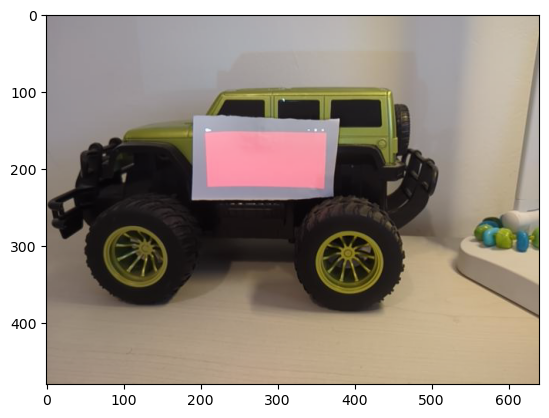

100%|██████████| 27/27 [00:05<00:00,  4.59it/s]

10572.0



C:\Users\danny\AppData\Local\Temp\ipykernel_7508\1624465522.py:174: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdmn(total=len(caps_x)*len(caps_y))


  0%|          | 0/1458 [00:00<?, ?it/s]

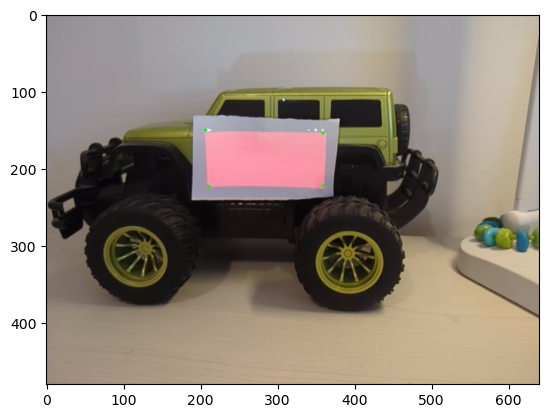

In [9]:
jumps = 15



def find_rectangles(frame):
    blurred = cv2.GaussianBlur(frame, (5, 5), 0)
    # edges = cv2.Canny(frame, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    rectangles = []
    
    for contour in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check if it's a rectangle
        if len(approx) == 4 and cv2.isContourConvex(approx):
            # Calculate the aspect ratio and area
            area = cv2.contourArea(approx)
            print(area)
            if area > 100:  # Filter small shapes
                # check if the rectangle is black
                x, y, w, h = cv2.boundingRect(approx)
                # chuck if rectangles lines are white
                # if frame[y:y+h, x:x+w].mean() < 250:
                rectangles.append(approx)
        # return the bigest rectangle
    if len(rectangles) > 0:
        rectangles = max(rectangles, key=cv2.contourArea)
    else:
        rectangles = []
        
    return rectangles    

def plot_img(img,c='red'):
    # plt.imshow(img.transpose(1,0,2))
    cv2.imshow('a', cv2.cvtColor(img.transpose(1,0,2), cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)

# cv2.destroyAllWindows()
for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    


secondary_screen_width, secondary_screen_height = 800, 400 
scale = 1

pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 




cv2.destroyAllWindows()

clear_output()

print('capturing base')

time.sleep(1)


for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame_for_saving = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    


caps_x = []
caps_y = []


pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
plot_img(pattern)


for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

time.sleep(3)

clear_output()
print('capturing black base')
pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
red = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8)
red[:,:,0] = 100
plot_img(red)
time.sleep(3)

red_frames = []
for k in range(30):
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    red_frames.append(frame)
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame_red = np.mean(red_frames[-20:],axis=0).astype(np.uint8)
plt.imshow(orig_ref_frame_red)
plt.show()
    

for i in tqdm.tqdm(range(0,pattern.shape[0],jumps)):
    pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
    pattern[i:i+3,:,0] = 255
    
    plot_img(pattern,'black')

    time.sleep(0.1)
    for k in range(5):
        ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
    else:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        caps_x.append(frame)



for i in tqdm.tqdm(range(0,pattern.shape[1],jumps)):
    pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
    pattern[:,i:i+3,0] = 255
    
    plot_img(pattern,'black')

    time.sleep(0.1)
    for k in range(5):
        ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
    else:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        caps_y.append(frame)


frame = copy.deepcopy(orig_ref_frame_red)
red_mask = (orig_ref_frame_red[:,:,0] > 220).astype(np.uint8)

plt.imshow(red_mask)

rect = find_rectangles(red_mask)

plt.imshow(frame)
# add a rectangle to the image
cv2.drawContours(frame, rect, -1, (0, 255, 0), 3)
plt.imshow(frame)

margin =  3
max_w = rect[:,0,:][:,0].max() - margin
min_w = rect[:,0,:][:,0].min() + margin
max_h = rect[:,0,:][:,1].max() - margin
min_h = rect[:,0,:][:,1].min() + margin 

ref_frame = cv2.cvtColor(orig_ref_frame[min_h:max_h,min_w:max_w], cv2.COLOR_BGR2GRAY)


positions = []
counter = 0

pbar = tqdmn(total=len(caps_x)*len(caps_y))

edges_ref = cv2.Canny(ref_frame, 50, 150, apertureSize=3)

ms = []
for x in range(len(caps_x)):
    for y in range(len(caps_y)):   
        #find vertical line in caps_x and horizontal line in caps_y

        # rect_caps_x = cv2.cvtColor( caps_x[x][min_h:max_h,min_w:max_w,:], cv2.COLOR_BGR2GRAY)
        # rect_caps_y = cv2.cvtColor( caps_y[y][min_h:max_h,min_w:max_w,:], cv2.COLOR_BGR2GRAY)
        rect_caps_x =caps_x[x][min_h:max_h,min_w:max_w,0]
        rect_caps_y =caps_y[y][min_h:max_h,min_w:max_w,0]

        rect_caps_x = rect_caps_x * (rect_caps_x>220)
        rect_caps_y = rect_caps_y * (rect_caps_y>220)
        

        # d_x = rect_caps_x-ref_frame

        # d_x = d_x* ( (d_x < 200) * (d_x > 10))

        # d_y = rect_caps_y-ref_frame

        # d_y = d_y* ( (d_y < 200) * (d_y > 10))
    
        # edges_x = cv2.Canny(rect_caps_x, 50, 150, apertureSize=3)
        # edges_y = cv2.Canny(rect_caps_y, 50, 150, apertureSize=3)
        # if edges_x.max() != 255 or edges_y.max() != 255:
        #     # print('bad frame')
        #     continue
        
        # # idx_x, idx_y = np.array(((edges_x == 255) * (edges_y == 255)).nonzero()).T.mean(0).astype(int)
        # lines = cv2.HoughLinesP(image=edges_y-edges_ref,rho=1,theta=np.pi/180, threshold=20,minLineLength=10)#,lines=np.array([]), minLineLength=1,maxLineGap=80)
        # if lines is None:
        #     print ('no y lines')
        #     if y > 10:
        #         raise
        #     continue
        # a,b,c = lines.shape
        # edges_y_l = copy.deepcopy(edges_y)*0
        # for i in range(a):
        #     cv2.line(edges_y_l, (0, lines[i][0][1]), (edges_y.shape[1], lines[i][0][3]), 255, 1, cv2.LINE_AA)

        # lines = cv2.HoughLinesP(image=edges_x-edges_ref,rho=1,theta=np.pi/180, threshold=20,minLineLength=10)#,lines=np.array([]), minLineLength=1,maxLineGap=80)
        # if lines is None:
        #     print ('no x lines')
        #     if x > 15:
        #         raise
        #     continue
        # a,b,c = lines.shape
        # edges_x_l = copy.deepcopy(edges_x)*0
        # for i in range(a):
        #     cv2.line(edges_x_l, (lines[i][0][0], 0), (lines[i][0][2],edges_x.shape[0]), 255, 1, cv2.LINE_AA)

        # edges_cut = (rect_caps_x+rect_caps_y).argmax()#(edges_x_l* edges_y_l).argmax()
        m = (rect_caps_x.astype(float) + rect_caps_y.astype(float)-2*ref_frame.astype(float))
        ms.append(m)

        edges_cut = m.argmax()

        # print(m.max())
        # if m.max() < 140:
        #     continue
        edges_cut_idx = np.unravel_index(edges_cut,rect_caps_y.shape)

        idx_x, idx_y = edges_cut_idx

        if idx_x < 0 or idx_y < 0:
            continue

      
        orig_idx_y = idx_x + min_h
        orig_idx_x = idx_y + min_w
        # comb = edges_x + edges_y
        positions.append(((x * jumps,y * jumps),(orig_idx_x,orig_idx_y)))
        counter +=1 
        pbar.update(1)
        # if counter % 1000 == 0:
        #     plt.imshow(comb)
        #     plt.scatter(idx_y,idx_x)
        #     plt.show()


original_points = np.array([x[0] for x in positions])
new_points = np.array([x[1] for x in positions])

H, _ = cv2.findHomography(original_points.astype(np.float64), new_points.astype(np.float64), cv2.RANSAC )


# Warp original points
warped_points_pred = cv2.perspectiveTransform(original_points.reshape(-1, 1, 2).astype(np.float64), H)

# Plot on the captured image
# plt.imshow(new_points, cmap='gray')



In [10]:
cv2.destroyAllWindows()
time.sleep(3)
for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame_for_saving = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    

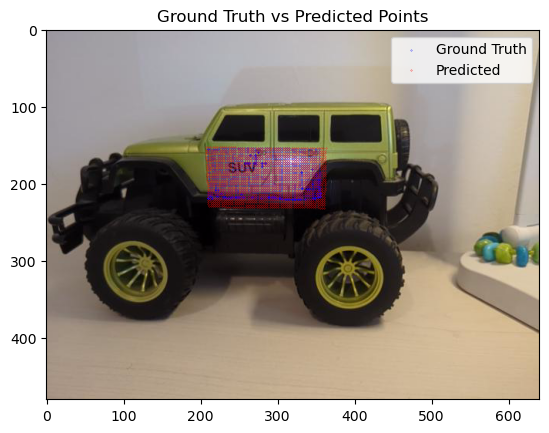

In [11]:
plt.imshow(orig_ref_frame_for_saving)
plt.scatter(new_points[:, 0], new_points[:, 1], c='blue', label='Ground Truth', s=0.05)
# plt.scatter(new_points_sampled[:, 0], new_points_sampled[:, 1], c='blue', label='Ground Truth', s=0.05)
plt.scatter(warped_points_pred[:, 0, 0], warped_points_pred[:, 0, 1], c='red', label='Predicted', s=0.05)
plt.legend()
plt.title('Ground Truth vs Predicted Points')
plt.show()

In [12]:
import pickle
dump_dir = './dump_for_train/'
with open(dump_dir + 'orig_ref_frame.pickle','wb') as f:
    pickle.dump(orig_ref_frame_for_saving,f)

with open(dump_dir + 'H.pickle','wb') as f:
    pickle.dump(H,f)


In [26]:
cv2.destroyAllWindows()

In [ ]:
from utils import classfier

In [24]:
from diffusers import StableDiffusionPipeline
import torch

# Load stable diffusion model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vae=  pipe.vae
vae =  torch.compile(vae.to(device))

def decode_latents_grad(latents):
    # latents = F.interpolate(latents, (64, 64), mode='bilinear', align_corners=False)
    latents = 1 / 0.18215 * latents

    imgs = vae.decode(latents).sample

    imgs = (imgs / 2 + 0.5).clamp(0, 1)

    return imgs

def decode_latents(latents):
    # latents = F.interpolate(latents, (64, 64), mode='bilinear', align_corners=False)
    with torch.no_grad():
            latents = 1 / 0.18215 * latents

            with torch.no_grad():
                imgs = vae.decode(latents).sample

            imgs = (imgs / 2 + 0.5).clamp(0, 1)

    return imgs

def encode_imgs(imgs):
    # imgs: [B, 3, H, W]
    with torch.no_grad():
            imgs = 2 * imgs - 1

            posterior = vae.encode(imgs).latent_dist
            latents = posterior.sample() * 0.18215

    return latents

In [48]:
from utils.classfier import *


In [ ]:
orig_clases = [torch.tensor([x]*batch_size).cuda() for x in [817, 705, 609, 586, 436, 627, 468, 621, 803, 407, 408, 751, 717,866, 661]]

def adv_loss_calc(image):
    adv_loss = 0
    pred = resnet_predict_raw(image)
    for p in pred:
      adv_loss += torch.stack([p[c.item()] for c in orig_clases]).mean() / pred.shape[0]
    return adv_loss

In [17]:
import pickle
from torchvision import transforms
import matplotlib.pyplot as plt
tt = transforms.ToTensor()
# load data from calibration
# with open('./calibration_dump/calibration4.pickle','rb') as f:
#     H = pickle.load(f)
# with open('./calibration_dump/orig_ref_frame4.pickle','rb') as f:
#     orig_ref_frame = pickle.load(f)

from torchvision import transforms

tt = transforms.ToTensor()

import torch 
import kornia
H_t = torch.tensor(H).float().unsqueeze(0).cuda()
def warp(img):
    return kornia.geometry.transform.warp_perspective(img, H_t, (orig_ref_frame.shape[0], orig_ref_frame.shape[1]))


In [50]:

# resizer =  torchvision.transforms.Resize((300, 600))
# latent = torch.rand((1,4, 16, 16), device=device, requires_grad=True)

# opt = torch.optim.Adam([latent], lr=0.5)
# opt.zero_grad()

# adv_patch = resizer(vae.decode(latent).sample).clamp(0,0.3922)
    

In [51]:
# calc number of parameters in lora
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
# count_parameters(lora)

In [ ]:
# pattern = cv2.imread(r"D:\Users\danny\Downloads\o8.png")


In [ ]:
for i in range(5):
    ret, frame = cap.read()
    if not ret:
        raise
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(frame)

In [ ]:
ref_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255


In [ ]:
# resizer =  torchvision.transforms.Resize((300, 600))


In [ ]:

# adv_patchs = []
# for amp in [4,5,6]:
#     latent = torch.randn((10,4, 16, 16), device=device) * amp
#     with torch.no_grad():
#         adv_patch = resizer(vae.decode(latent).sample).clamp(0,0.3922)
#         adv_patchs.append(adv_patch)
# adv_patch = torch.concat(adv_patchs,dim=0)
# w_mask  =warp(adv_patch*0+1)
# w  =warp(adv_patch)
# sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
# sum_tensor = sum_tensor.cpu()

# adv_patch_np = adv_patch.detach().cpu().numpy().transpose(0,2,3,1)

# del adv_patch

In [ ]:
# frames = []
# # latent = torch.randn((3,4, 16, 16), device=device)
# # with torch.no_grad():
# #     adv_patch = resizer(vae.decode(latent).sample).clamp(0,0.3922)
# # adv_patch_np = adv_patch.detach().cpu().numpy().transpose(0,2,3,1)

# cv2.imshow('image',cv2.cvtColor(adv_patch_np[0], cv2.COLOR_RGB2BGR))
# cv2.waitKey(1)
# time.sleep(10)

# for patch in adv_patch_np:
#     cv2.imshow('image',cv2.cvtColor(patch, cv2.COLOR_RGB2BGR))
#     cv2.waitKey(1)
#     time.sleep(1)
#     for i in range(5):
#         ret, frame = cap.read()
#         if not ret:
#             raise
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     frames.append(frame)
# cv2.destroyAllWindows()


In [ ]:
# lora_opt = torch.optim.Adam(lora.conv_adapter.parameters(), lr=0.001)
L1 =  nn.L1Loss()

In [ ]:
# frames_t = torch.tensor(np.stack(frames) / 255).float()
# frames_t = frames_t.permute(0,3,1,2)

In [20]:
import torchvision
resizer =  torchvision.transforms.Resize((400, 800))
de_resizer = torchvision.transforms.Resize((32, 32))

In [43]:
latent = (torch.rand((300,4, 4, 4), device=device)  - 0.5) * 2
decoded_latents = decode_latents(latent).float()

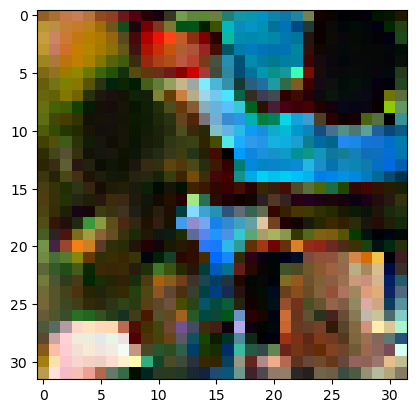

In [28]:
plt.imshow(decoded_latents[11].cpu().numpy().transpose(1,2,0))

In [ ]:
import pickle
with open('dump_for_train/decoded_latents.pickle','rb') as f:
    decoded_latents_lst = pickle.load(f)

In [44]:
# latent = torch.rand((500,3, 4, 4), device='cuda') 
decoded_latents = resizer(decoded_latents)

In [45]:
# plt.imshow(decoded_latents[30].cpu().detach().numpy().transpose(1,2,0))

In [22]:

H_t_i = H_t.inverse()
def unwarp(img):
    return kornia.geometry.transform.warp_perspective(img, H_t_i , (330,660))

In [47]:
frames = []
adv_patchs = []

for adv_patch in tqdm.tqdm_notebook(decoded_latents):


    cv2.imshow('a',cv2.cvtColor(adv_patch.detach().cpu().float().numpy().transpose(1,2,0), cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)
    time.sleep(1)
    for ww in range(3):
        ret, frame = cap.read()
    if not ret:
        raise
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    if len(frames) != 0 and (frame != frames[-1]).sum() == 0:
        print('same frame')
        raise

    cv2.destroyAllWindows()

    frames.append(frame)
    adv_patchs.append(adv_patch)


C:\Users\danny\AppData\Local\Temp\ipykernel_7508\1367982610.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for adv_patch in tqdm.tqdm_notebook(decoded_latents):


  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
# frames = []
# adv_patchs = []
# for decoded_latents in tqdm.tqdm_notebook(decoded_latents_lst[::1]):
#     decoded_latents = resizer(decoded_latents)
#     for adv_patch in decoded_latents:

#         adv_patch = adv_patch / 2 + 0.5
#         adv_patch = adv_patch.clamp(0, 1)
#         cv2.imshow('a',cv2.cvtColor(adv_patch.detach().cpu().float().numpy().transpose(1,2,0), cv2.COLOR_RGB2BGR))
#         cv2.waitKey(1)
#         time.sleep(1)
#         for ww in range(3):
#             ret, frame = cap.read()
#         if not ret:
#             raise
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#         if len(frames) != 0 and (frame != frames[-1]).sum() == 0:
#             print('same frame')
#             raise

#         cv2.destroyAllWindows()

#         frames.append(frame)
#         adv_patchs.append(adv_patch)


In [ ]:
sum_tensors = []
for adv_patch in decoded_latent:
    adv_patch = adv_patch.unsqueeze(0).cuda().float()
    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)
    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
    sum_tensor = sum_tensor.cpu()
    sum_tensors.append(sum_tensor)

In [ ]:
plt.imshow(decoded_latent[0].detach().cpu().float().numpy().transpose(1,2,0))

100

In [61]:
from torchvision.transforms import InterpolationMode
resizer =  torchvision.transforms.Resize((300, 600), interpolation=InterpolationMode.BICUBIC )
de_resizer = torchvision.transforms.Resize((32, 32), interpolation=InterpolationMode.BICUBIC )

In [48]:
unwrapped_frames = []
with torch.no_grad():
    for frame in tqdm.tqdm_notebook(frames):
        frame_tensor = torch.tensor(frame).permute(2,0,1).float().cuda().unsqueeze(0) / 255
        unwrapped_frame = unwarp(frame_tensor).squeeze(0).cpu()
        unwrapped_frames.append(unwrapped_frame)

C:\Users\danny\AppData\Local\Temp\ipykernel_7508\4158775939.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for frame in tqdm.tqdm_notebook(frames):


  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
adv_patchs = torch.stack(adv_patchs)

In [61]:
unwrapped_frames = torch.stack(unwrapped_frames)

In [65]:
f'{dump_dir}/adv_patchs.pt'

'./dump_for_train//adv_patchs.pt'

In [74]:
# save the adv_patchs and unwrapped_frames as jpg to current_pairs dir
for i in tqdm.tqdm_notebook(range(adv_patchs.shape[0])):
    adv_patch = adv_patchs[i].cpu().numpy().transpose(1,2,0)
    unwrapped_frame = unwrapped_frames[i].cpu().numpy().transpose(1,2,0)
    adv_patch = (adv_patch * 255).astype(np.uint8)
    unwrapped_frame = (unwrapped_frame * 255).astype(np.uint8)
    adv_patch = cv2.cvtColor(adv_patch, cv2.COLOR_RGB2BGR)
    unwrapped_frame = cv2.cvtColor(unwrapped_frame, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'current_pairs/adv_patch_{i}.jpg', adv_patch)
    cv2.imwrite(f'current_pairs/unwrapped_frame_{i}.jpg',unwrapped_frame)

C:\Users\danny\AppData\Local\Temp\ipykernel_7508\2964777399.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(adv_patchs.shape[0])):


  0%|          | 0/300 [00:00<?, ?it/s]

In [70]:
# save adv_patchs and unwrapped_frames
torch.save(latent.cpu(),f'current_pairs/latent.pt')

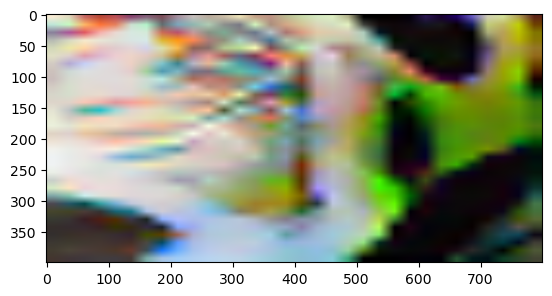

In [53]:
plt.imshow(adv_patchs[9].cpu().numpy().transpose(1,2,0))

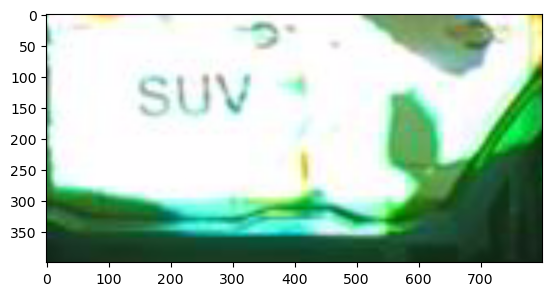

In [54]:
plt.imshow(unwrapped_frames[9].numpy().transpose(1,2,0))

In [ ]:
unwrapped_frames = []
unwrapped_frames_encoded = []
unwrapped_frames_ds = []
with torch.no_grad():
    for frame in tqdm.tqdm_notebook(frames):
        frame_tensor = torch.tensor(frame).permute(2,0,1).float().cuda().unsqueeze(0) / 255
        unwrapped_frame = unwarp(frame_tensor).squeeze(0).cpu()
        unwrapped_frames.append(unwrapped_frame)
        ds = de_resizer(unwrapped_frame)
        unwrapped_frames_ds.append(ds)
        encoded_unwrapped_frame = encode_imgs(ds.unsqueeze(0).cuda()).squeeze(0).cpu()
        unwrapped_frames_encoded.append(encoded_unwrapped_frame)

    
unwrapped_frames_encoded = torch.stack(unwrapped_frames_encoded)

dist = 0
for ds,orig in zip(unwrapped_frames_ds,unwrapped_frames):
    resizer(ds) - orig

C:\Users\danny\AppData\Local\Temp\ipykernel_18812\4066732906.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for frame in tqdm.tqdm_notebook(frames):


  0%|          | 0/80 [00:00<?, ?it/s]

In [88]:
(resizer(torch.stack(unwrapped_frames_ds)) - torch.stack(unwrapped_frames)).pow(2).mean()
rmse = torch.sqrt((resizer(torch.stack(unwrapped_frames_ds)) - torch.stack(unwrapped_frames)).pow(2).mean())
print(rmse.item())
print(torch.stack(unwrapped_frames).std())

0.025213727727532387
tensor(0.1894)


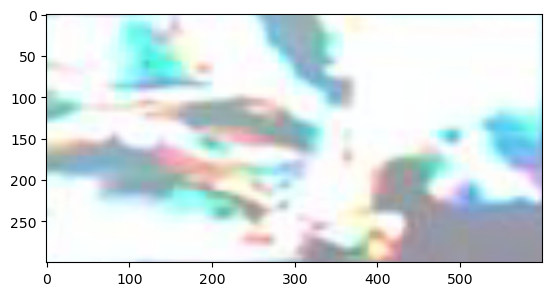

In [77]:
plt.imshow(unwrapped_frames[0].cpu().numpy().transpose(1,2,0))

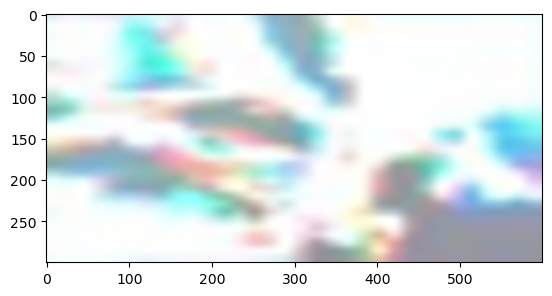

In [76]:
plt.imshow(resizer(torch.stack(unwrapped_frames_ds))[0].cpu().numpy().transpose(1,2,0))

In [ ]:
with torch.no_grad():
    o = decode_latents_grad(encoded_unwrapped_frame.unsqueeze(0).cuda())

In [ ]:
torch.cuda.empty_cache()

In [ ]:
encoded_unwrapped_frame.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64)

In [ ]:
X = unwrapped_frames_encoded.cpu().reshape(unwrapped_frames_encoded.shape[0],-1).numpy()
X_reduced = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_reduced)

# Check reconstruction error
error = np.mean((X - X_reconstructed) ** 2)
print("Reconstruction MSE:", error)

In [138]:
# do linear regression from latent to unwrapped_frames_encoded
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

unwrapped_frames_encoded_np = unwrapped_frames_encoded.detach().cpu().numpy().reshape(-1, 4*4*4)
latent_np = latent.detach().cpu().numpy()

unwrapped_frames_encoded_np_train = unwrapped_frames_encoded_np[:int(unwrapped_frames_encoded_np.shape[0]*0.8)]
latent_np_train = latent_np[:int(latent_np.shape[0]*0.8)]
unwrapped_frames_encoded_np_test = unwrapped_frames_encoded_np[int(unwrapped_frames_encoded_np.shape[0]*0.8):]
latent_np_test = latent_np[int(latent_np.shape[0]*0.8):]

reg =   SVR(kernel='rbf', C=1.0, epsilon=0.1).fit(latent_np_train.reshape(-1, 4*4*4), unwrapped_frames_encoded_np_train)
latent_pred = reg.predict(latent_np_test.reshape(-1, 4*4*4))
# latent_pred = pca.inverse_transform(latent_pred)
latent_pred = torch.tensor(latent_pred).float()
# error = ((latent_pred.reshape(unwrapped_frames_encoded.shape) - unwrapped_frames_encoded)**2).mean()
rmse = ((latent_pred.reshape(unwrapped_frames_encoded_np_test.shape) - unwrapped_frames_encoded_np_test)**2).mean().sqrt()

print("Reconstruction RMSE:", rmse.item())

print("STD:", unwrapped_frames_encoded_np_test.std().item())



ValueError: y should be a 1d array, got an array of shape (64, 64) instead.

In [124]:
latent_np_train.shape

(64, 4, 4, 4)

In [117]:
latent_pred

tensor([[ 0.7659,  0.9491,  0.0827,  ..., -0.0033, -0.7216, -0.2315],
        [ 1.4325, -0.1866,  1.5886,  ..., -0.7043, -0.0852,  0.2399],
        [ 1.3193,  1.0249,  1.1543,  ..., -0.1876,  0.0183, -0.3936],
        ...,
        [ 1.3217,  1.4823,  0.9099,  ..., -0.2526, -0.0558, -0.1677],
        [ 0.1199,  1.1777, -0.0578,  ...,  0.0900, -0.7691, -0.4412],
        [ 1.7062,  0.8362, -0.1712,  ..., -0.9104, -0.9259, -0.2590]])

In [126]:
mapping_tensor = torch.tensor(reg.coef_)

In [127]:
mapping_tensor.shape

torch.Size([64, 64])

In [92]:

with open(dump_dir + 'mapping_tensor.pickle','wb') as f:
    pickle.dump(mapping_tensor,f)

# save pca transform 
# with open(dump_dir + 'pca.pickle','wb') as f:
#     pickle.dump(pca,f)

In [ ]:
# move pca and inverse pca vectors to pytorch
pca_torch = torch.tensor(pca.components_).float().cuda()
pca_torch_inv = torch.tensor(pca.inverse_transform(np.eye(64))).float().cuda()


In [128]:
latent_pred_decoded = resizer( decode_latents(latent_pred.cuda().reshape(-1,4,4,4)).squeeze(0).cpu())

In [129]:
latent_pred_decoded.shape

torch.Size([80, 3, 300, 600])

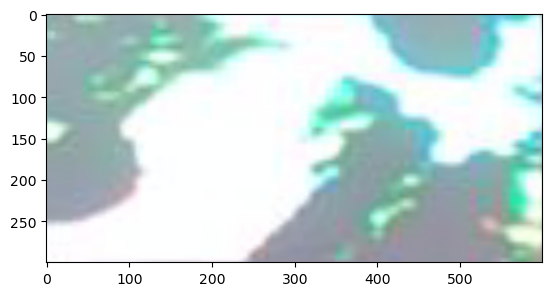

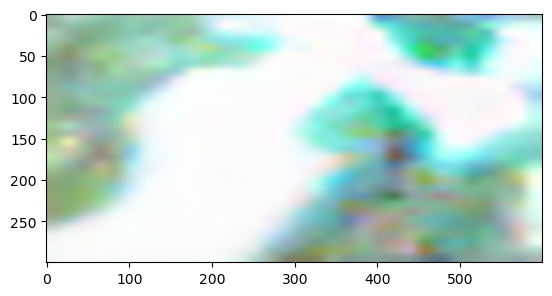

In [130]:
idx = 4
plt.imshow(unwrapped_frames[idx].cpu().numpy().transpose(1,2,0))
plt.show()
plt.imshow(latent_pred_decoded[idx].detach().cpu().float().numpy().transpose(1,2,0))
plt.show()

In [ ]:
device = 'cuda'
latent_adv = torch.randn((1,4, 4, 4), device=device) 
latent_adv.requires_grad = True

# lbfgs_latent_opt = torch.optim.LBFGS([latent], lr=1, max_iter=10)

latent_opt = torch.optim.Adam([latent_adv], lr=0.1)

In [ ]:
mapping_tensor = mapping_tensor.to(device).float()


def latent_closure_adp():
    # with torch.amp.autocast(device):
    lbfgs_latent_opt.zero_grad()

    o = torch.matmul(mapping_tensor,latent.reshape(-1,4*4*4).T)
    o = o.reshape(1,4,37,75)
    adv_patch = decode_latents_grad(o).float()

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w * 1#((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    adv_loss = adv_loss_calc(sum_tensor) #+ adv_patch.norm() / 10000

    adv_loss.backward()

    return adv_loss

In [ ]:
for i in tqdm.tqdm_notebook(range(1000)):
    print(i)
    # adv_loss = lbfgs_latent_opt.step(latent_closure_adp)
    latent_opt.zero_grad()
    
    o = torch.matmul(mapping_tensor,latent_adv.reshape(-1,4*4*4).T)
    # o = torch.matmul(pca_torch_inv.T, o).T
    # o = o.reshape(1,4,37,75)
    adv_patch = decode_latents_grad(o).float()

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w * 1#((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    adv_loss = adv_loss_calc(sum_tensor) #+ adv_patch.norm() / 10000

    adv_loss.backward()

    latent_opt.step()

    if i % 10 == 0:
        # print(f"Iteration {i}, Loss: {latent_closure_adp().item():.4f}")
        print(f"Iteration {i}, Loss: {adv_loss.item():.4f}. grad_norm: {latent_adv.grad.norm().item():.4f}")

        with torch.no_grad():
            
            o = torch.matmul(mapping_tensor,latent_adv.reshape(-1,4*4*4).T)
            # o = torch.matmul(pca_torch_inv.T, o).T
            # o = o.reshape(1,4,37,75)
            adv_patch = decode_latents_grad(o).float()

            w_mask  =warp(adv_patch*0+1)
            w  =warp(adv_patch)

            sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w * 1##((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
            sum_tensor = sum_tensor.cpu()

            plt.imshow(sum_tensor[0].permute(1,2,0).numpy())

            plt.show()
            print(resnet_predict(sum_tensor.cuda()))

In [ ]:
latent_adv

In [ ]:
o.shape

In [ ]:
o.shape

In [ ]:
kk = 11
w = (warp(adv_patchs[kk].unsqueeze(0).cuda().float()).squeeze(0).cpu().permute(1,2,0).numpy() * 255).astype(np.uint8)
plt.imshow(w)
plt.show()
plt.imshow(frames[kk]+w)
plt.show()
plt.imshow(frames[kk])
plt.show()
plt.imshow(adv_patchs[kk].cpu().permute(1,2,0).float())
plt.show()
plt.imshow(unwrapped_frames[kk].permute(1,2,0).float())
plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.optim as optim

# Define the dataset
class AdvPatchDataset(Dataset):
    def __init__(self, adv_patchs, unwrapped_frames):
        self.adv_patchs = adv_patchs
        self.unwrapped_frames = unwrapped_frames

    def __len__(self):
        return len(self.adv_patchs)

    def __getitem__(self, idx):
        adv_patch = self.adv_patchs[idx]
        unwrapped_frame = self.unwrapped_frames[idx]
        return adv_patch, unwrapped_frame


In [ ]:
# Split data into train and test sets
train_adv_patchs, test_adv_patchs, train_unwrapped_frames, test_unwrapped_frames = train_test_split(
    adv_patchs, unwrapped_frames, test_size=0.2, random_state=42
)

# Create datasets and loaders
train_dataset = AdvPatchDataset(train_adv_patchs, train_unwrapped_frames)
test_dataset = AdvPatchDataset(test_adv_patchs, test_unwrapped_frames)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:



# Define a small CNN model
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss, and optimizer
model = SmallCNN().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for adv_patch, unwrapped_frame in tqdm.tqdm(train_loader):
        adv_patch = adv_patch.cuda().float()
        unwrapped_frame = unwrapped_frame.cuda().float()

        optimizer.zero_grad()
        output = model(adv_patch)
        loss = criterion(output, unwrapped_frame)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}")

    # Evaluate on test set
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for adv_patch, unwrapped_frame in test_loader:
            adv_patch = adv_patch.cuda().float()
            unwrapped_frame = unwrapped_frame.cuda().float()

            output = model(adv_patch)
            loss = criterion(output, unwrapped_frame)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}")

In [ ]:
# save the model
torch.save(model.state_dict(), 'small_cnn_model.pth')

In [ ]:
# Load the model for inference
mapper = SmallCNN().cuda()
mapper.load_state_dict(torch.load('small_cnn_model.pth'))
mapper.eval()

In [ ]:
with torch.no_grad():
    for adv_patch, unwrapped_frame in test_loader:
        adv_patch = adv_patch.cuda().float()
        unwrapped_frame = unwrapped_frame.cuda().float()
        output = model(adv_patch)

        break

In [ ]:
output.shape

In [ ]:
idx = 6
plt.imshow(adv_patch[idx].permute(1,2,0).cpu().numpy())
plt.show()
plt.imshow(output[idx].permute(1,2,0).cpu().numpy())
plt.show()
plt.imshow(unwrapped_frame[idx].permute(1,2,0).cpu().numpy())
plt.show()

In [ ]:
encoded_adv_patch = []
for adv_patch in decoded_latent:
    adv_patch = adv_patch.unsqueeze(0).cuda().float()
    encoded_adv_patch.append(encode_imgs(adv_patch).squeeze(0).cpu())


In [ ]:

unwrapped_frames_encoded = []

for u in tqdm.tqdm(unwrapped_frames):
    ut = u.unsqueeze(0).cuda()
    unwrapped_frame_encoded = encode_imgs(ut.half()).squeeze(0).cpu().float()
    unwrapped_frames_encoded.append(unwrapped_frame_encoded)


In [ ]:
plt.imshow(decoded_latent[10].detach().cpu().float().numpy().transpose(1,2,0))

In [ ]:
plt.imshow(unwrapped_frames[10].permute(1,2,0).numpy())

In [ ]:
sum_tensors = torch.concat(sum_tensors)

In [ ]:
plt.imshow(frames[0])

In [ ]:
plt.imshow(sum_tensors[0].permute(1,2,0).numpy())

In [ ]:
sum_tensors_encoded = []
for sum_tensor in tqdm.tqdm(sum_tensors):
    sum_tensor_encoded = encode_imgs(sum_tensor.half().cuda().unsqueeze(0)).cpu()
    sum_tensors_encoded.append(sum_tensor_encoded)

In [ ]:
frame_tensors = [] 
for frame in tqdm.tqdm(frames):
    frame_tensor = torch.tensor(frame).permute(2,0,1).float().cuda() / 255
    frame_tensors.append(frame_tensor)

In [ ]:
frames_encoded = []
for frame_tensor in tqdm.tqdm(frame_tensor):
    frame_encoded = encode_imgs(frame_tensor).cpu()
    frames_encoded.append(frame_encoded)

In [ ]:
s_train = sum_tensors_encoded[:90]
f_train = frames_encoded[:90]

In [ ]:
    


class LightCNN(nn.Module):
    def __init__(self):
        super(LightCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),  # 4x60x80 -> 8x60x80
            nn.ELU(),
            nn.Conv2d(8, 16, kernel_size=3, padding=1), # 8x60x80 -> 16x60x80
            nn.ELU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(16, 8, kernel_size=3, padding=1), # 16x60x80 -> 8x60x80
            nn.ELU(),
            nn.Conv2d(8, 3, kernel_size=3, padding=1) )  # 8x60x80 -> 4x60x80
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

ref_tensor_encoded = encode_imgs(ref_tensor.half().cuda()).cuda()

up_resizer = torchvision.transforms.Resize((60, 80))
# Example usage
class Mapper(nn.Module):
    def __init__(self):
        super(Mapper, self).__init__()
        self.mapper = nn.Sequential(
            nn.Linear(4 * 4 * 4, 32),  # Flattened input to flattened output
            nn.ReLU(),
            nn.Linear(32,32),
            nn.ReLU(),
            nn.Linear(32,32),
            nn.ReLU(),
            nn.Linear(32, 4 * 4 * 4)  # Flattened output to flattened input
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.mapper(x)  # Apply linear mapping
        x = x.view(x.size(0), 4, 4, 4)  # Reshape back to original dimensions
        # x = up_resizer(x)


        return x

mapper = LightCNN().cuda()#LightCNN().cuda()

In [ ]:
ref_tensor_decoded = decode_latents(ref_tensor_encoded).clamp(0,1).cpu()

In [ ]:
count_parameters(mapper)

In [ ]:
l_train = decoded_latent[:90]
f_train = unwrapped_frames[:90]

l_test = decoded_latent[90:]
f_test = unwrapped_frames[90:]

In [ ]:
len(adv_patchs)

In [13]:
dump_dir = './dump_for_train/'
import pickle

In [ ]:

with open(dump_dir + 'adv_patchs.pickle','wb') as f:
    pickle.dump(adv_patchs,f)
with open(dump_dir + 'unwrapped_frames.pickle','wb') as f:
    pickle.dump(unwrapped_frames,f)

with open(dump_dir + 'frames.pickle','wb') as f:
    pickle.dump(frames,f)   

In [14]:
# load H and orig_ref_frame
with open(dump_dir + 'H.pickle','rb') as f:
    H = pickle.load(f)
with open(dump_dir + 'orig_ref_frame.pickle','rb') as f:
    orig_ref_frame = pickle.load(f)

In [ ]:
d = decode_latents(l_train[0].half().unsqueeze(0).cuda())

In [ ]:
plt.imshow(d[0].detach().cpu().float().numpy().transpose(1,2,0))

In [ ]:
train_loader = torch.utils.data.DataLoader(list(zip(l_train, f_train)), batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(l_test, f_test)), batch_size=16, shuffle=False)
mapper_opt = torch.optim.Adam(mapper.parameters(), lr=0.001)
mapper.train()

In [ ]:
for epoch in range(1000):
    for i, (s, f) in enumerate(train_loader):
        s = s.cuda().float()
        f = f.cuda().float()
        mapper_opt.zero_grad()
        pred = mapper(s.squeeze(1))
        loss = L1(pred, f.squeeze(1))
        loss.backward()
        mapper_opt.step()
    test_loss = 0
    if epoch % 10 == 0:
        for i, (s, f) in enumerate(tqdm.tqdm(test_loader)):
            s_test = s.cuda().float()
            f_test = f.cuda().float()
            mapper_opt.zero_grad()
            pred_test = mapper(s_test.squeeze(1))
            loss = L1(pred_test, f_test.squeeze(1))
            test_loss += loss.item()
        test_loss /= len(test_loader)
        print(f"Epoch {epoch+1}, Test Loss: {test_loss:.4f}")
        



In [ ]:
plt.imshow(f_test[2].detach().cpu().float().numpy().transpose(1,2,0))

In [ ]:
plt.imshow(pred_test[2].detach().cpu().float().numpy().transpose(1,2,0))

In [ ]:
with open('./dump_for_train/adv_patch_orig.pickle','rb') as f:
    adv_patch_orig = pickle.load(f)

In [ ]:
cv2.imshow('image',cv2.cvtColor(adv_patch[0].detach().cpu().float().numpy().transpose(1,2,0), cv2.COLOR_RGB2BGR))
cv2.waitKey(1)
time.sleep(1)
for ww in range(3):
    ret, frame = cap.read()
if not ret:
    raise
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

cv2.destroyAllWindows()



In [ ]:
frame_tensor = torch.tensor(frame).permute(2,0,1).float().cuda() / 255

In [ ]:
uwarped_frame = warp(unwarp(frame_tensor.unsqueeze(0)))[0]
plt.imshow(uwarped_frame.permute(1,2,0).cpu().numpy())

In [ ]:
device = 'cuda'
latent = torch.randn((1,4, 16, 16), device=device) 
latent.requires_grad = True

resizer = torchvision.transforms.Resize((300, 600))

# latent = torch.rand((1,3, 10, 20), device=device) / 2
# latent.requires_grad = True

lbfgs_latent_opt = torch.optim.LBFGS([latent], lr=1, max_iter=10)
# latent_opt = torch.optim.Adam([latent], lr=0.001)

In [ ]:


def latent_closure_adp():
    # with torch.amp.autocast(device):
    lbfgs_latent_opt.zero_grad()
    d = decode_latents_grad(latent).float()

    adv_patch = resizer(d)

    adv_patch = mapper(adv_patch)

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w * 1#((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    adv_loss = adv_loss_calc(sum_tensor) #+ adv_patch.norm() / 10000

    adv_loss.backward()

    return adv_loss

In [ ]:
# latent_opt = torch.optim.Adam([latent], lr=0.001)

In [ ]:
ref_tensor = torch.tensor(frame).permute(2,0,1).float().cuda() / 255

In [ ]:
for i in tqdm.tqdm_notebook(range(1000)):
    adv_loss = lbfgs_latent_opt.step(latent_closure_adp)
    # latent_opt.zero_grad()
    # d = latent#decode_latents_grad(latent).float()

    # adv_patch = resizer(d)

    # adv_patch = mapper(adv_patch)

    # w_mask  =warp(adv_patch*0+1)
    # w  =warp(adv_patch)

    # sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    # adv_loss = adv_loss_calc(sum_tensor) #+ adv_patch.norm() / 10000
    
    # adv_loss.backward()

    # latent_opt.step()

    if i % 10 == 0:
        # print(f"Iteration {i}, Loss: {latent_closure_adp().item():.4f}")
        print(f"Iteration {i}, Loss: {adv_loss.item():.4f}. grad_norm: {latent.grad.norm().item():.4f}")

        with torch.no_grad():
            d = decode_latents(latent).float()
            adv_patch = resizer(d)
            adv_patch_m = mapper(adv_patch)

            w_mask  =warp(adv_patch_m*0+1)
            w  =warp(adv_patch_m)

            sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w * 1##((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
            sum_tensor = sum_tensor.cpu()

            plt.imshow(sum_tensor[0].permute(1,2,0).numpy())

            plt.show()
            print(resnet_predict(sum_tensor.cuda()))

In [1]:
import cv2
import time
from IPython.display import clear_output, display


In [ ]:
./patches/o

In [14]:
cv2.destroyAllWindows()

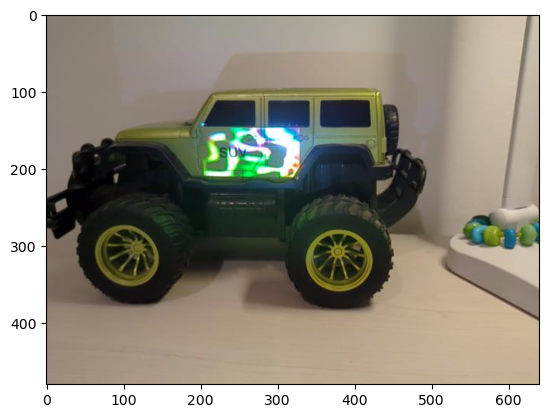

ambulance: 0.108%


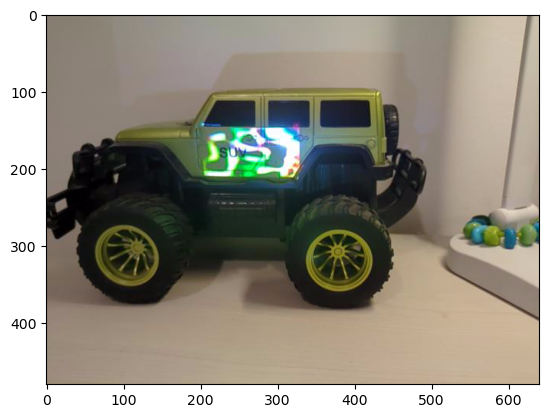

ambulance: 0.110%


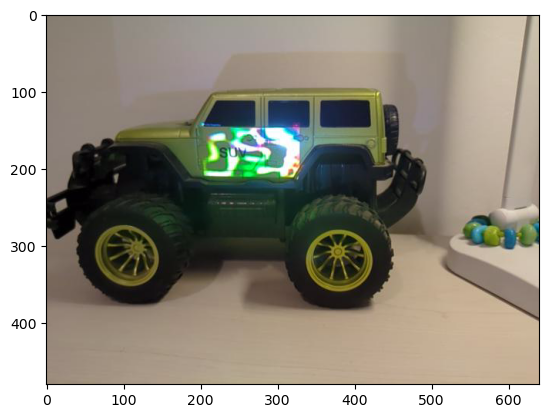

ambulance: 0.109%


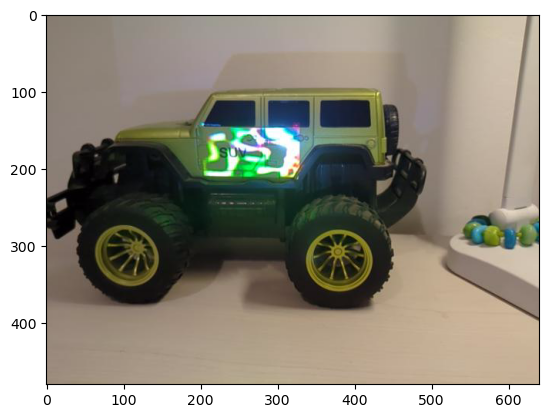

ambulance: 0.110%


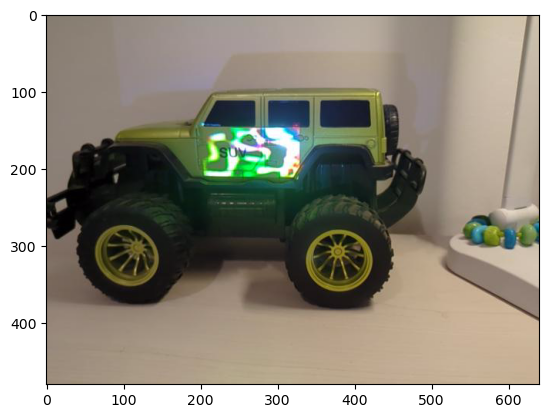

half track: 0.109%


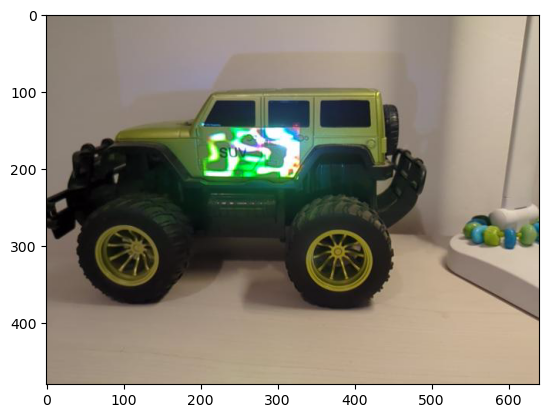

ambulance: 0.109%


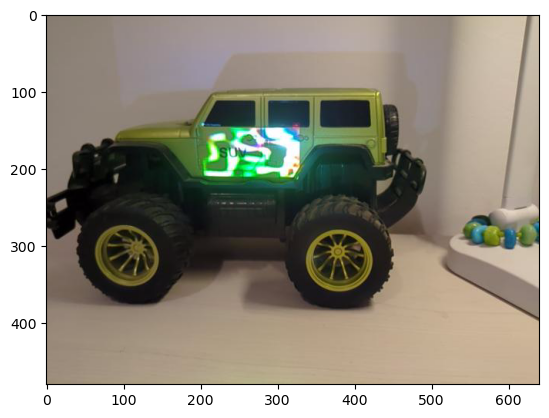

half track: 0.107%


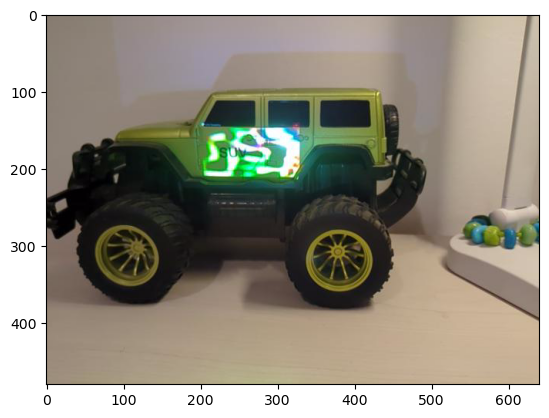

ambulance: 0.108%


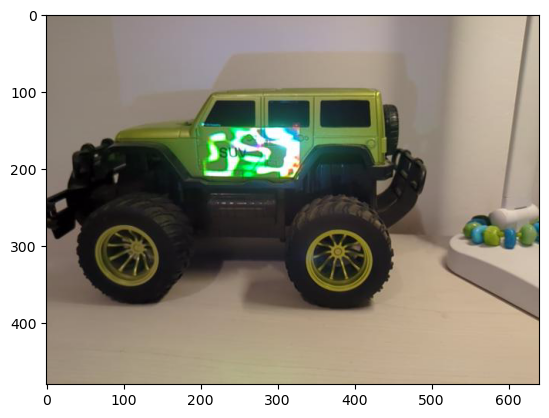

ambulance: 0.111%


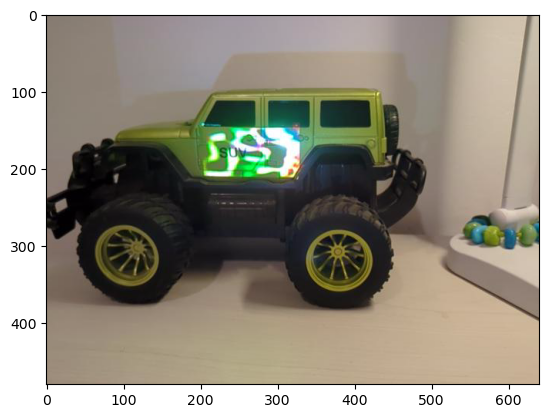

digital clock: 0.109%


In [10]:
im_load = cv2.imread('./patches/out_22_4_1.png')

im_load_m = cv2.imread('./patches/out_22_4_m_1.png')
im = cv2.cvtColor(im_load, cv2.COLOR_BGR2RGB)

cv2.imshow('a', im)

cv2.waitKey(1)
for i in range(10):
    time.sleep(3)
    for ww in range(7):
        ret, frame = cap.read()
    if not ret:
        raise
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.show()
    

    frame_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255 
    with torch.no_grad():
        print(resnet_predict(frame_tensor))
    time.sleep(1)
    # clear_output()

cv2.destroyAllWindows()

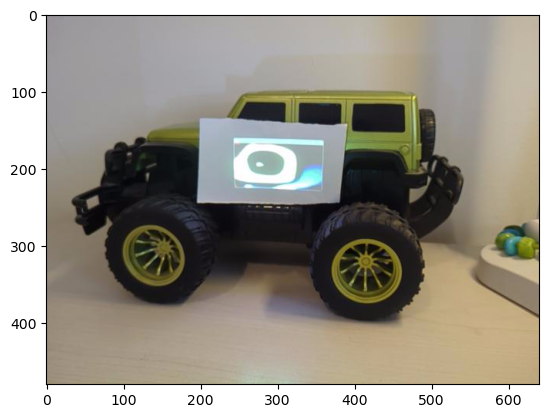

In [ ]:
plt.imshow(frame)

In [23]:
proj_patch = unwarp(frame_tensor)[0]


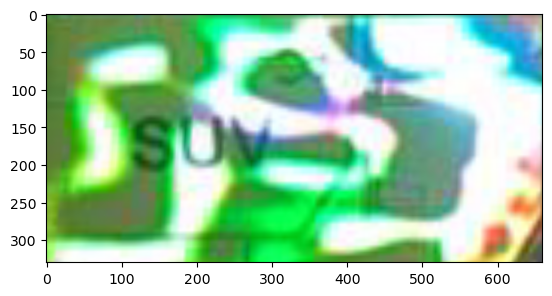

In [24]:
plt.imshow(proj_patch.cpu().numpy().transpose(1,2,0))

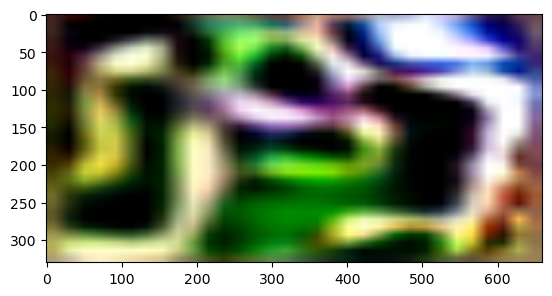

In [25]:
plt.imshow(im_load)

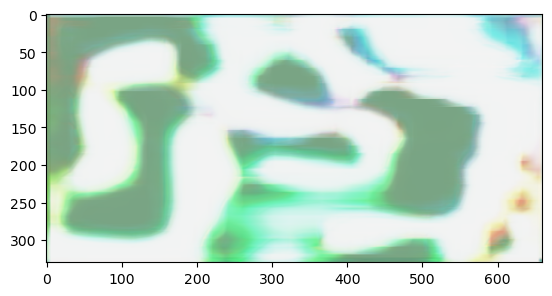

In [26]:
plt.imshow(im_load_m)

In [28]:
tt = transforms.ToTensor()

In [39]:
d=  proj_patch.cpu() - tt(im_load_m)
d_norm = (d-d.min()) / (d.max()-d.min())

In [40]:
d.pow(2).mean().sqrt()

tensor(0.2610)

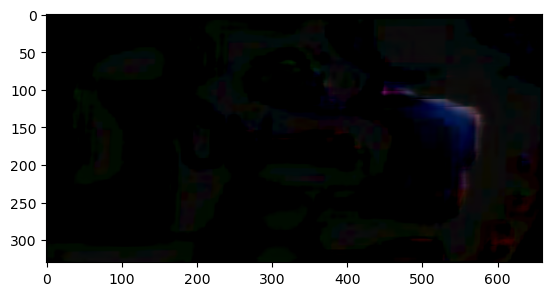

In [41]:
plt.imshow(d.cpu().numpy().transpose(1,2,0))

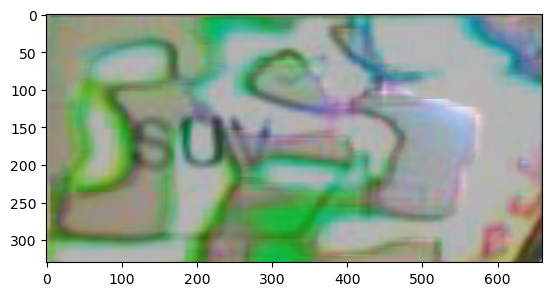

In [42]:
plt.imshow(d_norm.cpu().numpy().transpose(1,2,0))

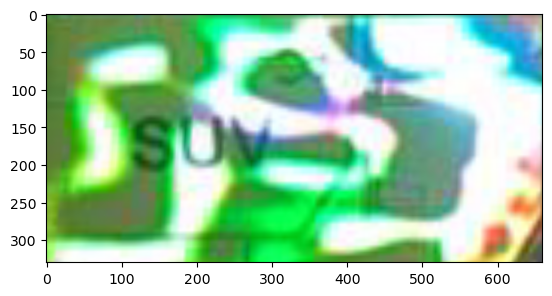

In [43]:
plt.imshow(proj_patch.permute(1,2,0).cpu().numpy())

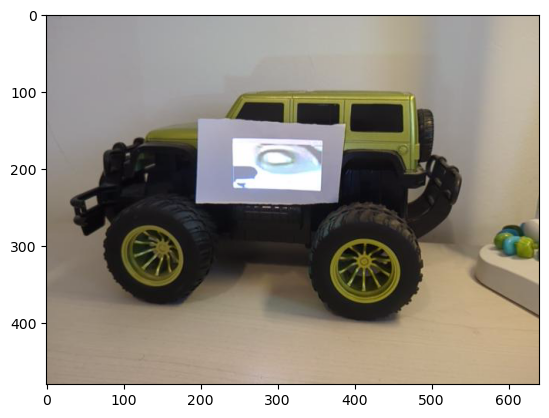

In [14]:
plt.imshow(frame_tensor[0].permute(1,2,0).cpu().numpy())

In [ ]:

im = cv2.cvtColor(im_load, cv2.COLOR_BGR2RGB)

for i in range(100):
    cv2.imshow('a', im)

    cv2.waitKey(1)
    time.sleep(1)
    for ww in range(7):
        ret, frame = cap.read()
    if not ret:
        raise
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    

    cv2.destroyAllWindows()

    frame_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255 
    with torch.no_grad():
        print(resnet_predict(frame_tensor))

    im_tensor = torch.tensor(im_load.transpose(2,0,1)).float().cuda() / 255

    proj_patch = unwarp(frame_tensor)[0]

    delta = adv_patch_m.cpu() / proj_patch.cpu()

    im_tensor = (im_tensor.cpu()*delta*0.1+0.9*im_tensor.cpu()).clamp(0,1)

    im = im_tensor.permute(1,2,0).numpy() * 255
    im = im.astype(np.uint8)

    plt.imshow(proj_patch.cpu().permute(1,2,0).numpy())
    plt.show()
    plt.imshow(im_load_m)
    plt.show()





half track: 0.111%


NameError: name 'unwarp' is not defined

In [ ]:
plt.imshow(im)

In [ ]:
proj_patch = unwarp(frame_tensor)[0]

In [ ]:
adv_patch_m = torch.tensor(im_load_m.transpose(2,0,1).astype(np.float32) / 255)

In [ ]:
delta = adv_patch_m.cpu() - proj_patch.cpu()

In [ ]:
delta.min()

In [ ]:
plt.imshow((im_tensor[0].cpu()+delta*0.1).permute(1,2,0).cpu().numpy())


In [ ]:
plt.imshow(adv_patch_m.permute(1,2,0).numpy())

In [ ]:
plt.imshow(proj_patch.permute(1,2,0).cpu().numpy())

In [ ]:
plt.imshow(im_tensor.cpu().squeeze(0).permute(1,2,0).numpy())

In [ ]:
w_mask  =warp(im_tensor*0+1)
w  =warp(im_tensor) * 0
sum_tensor =  ((w_mask != 0) * -1 + 1) * frame_tensor + w * 1

In [ ]:
plt.imshow(sum_tensor[0].permute(1,2,0).cpu().numpy())

In [ ]:
plt.imshow(frame)

In [ ]:
plt.imshow(frame)

In [ ]:
# save frame 
cv2.imwrite('./patches/frame.png',frame)

In [ ]:
resnet_predict(frame_tensor.cuda())

In [ ]:
plt.imshow((frame_tensor - sum_tensor[0].cuda())[0].permute(1,2,0).cpu().numpy())

In [ ]:
plt.imshow(frame_tensor[0].permute(1,2,0).cpu().numpy())

In [ ]:
print(f"Iteration {i}, Loss: {adv_loss.item():.4f}. grad_norm: {latent.grad.norm().item():.4f}")

with torch.no_grad():
    d = decode_latents(latent).float()
    adv_patch = resizer(d)
    adv_patch_m =unwrapped_frame.unsqueeze(0).cuda()# mapper(adv_patch)

    w_mask  =warp(adv_patch_m*0+1)
    w  =warp(adv_patch_m)

    sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w * 1##((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
    sum_tensor = sum_tensor.cpu()

    plt.imshow(sum_tensor[0].permute(1,2,0).numpy())

    plt.show()
    print(resnet_predict(sum_tensor.cuda()))

In [ ]:
plt.imshow(ref_tensor.permute(1,2,0).cpu().numpy())

In [ ]:
plt.imshow(sum_tensor[0].permute(1,2,0).numpy())

In [ ]:
plt.imshow(adv_patch[0].detach().cpu().float().numpy().transpose(1,2,0))

In [ ]:
plt.imshow(mapper(resizer(latent))[0].cpu().detach().permute(1,2,0).numpy())

In [ ]:
    cv2.imshow('a',cv2.cvtColor(adv_patch.detach().cpu().numpy().transpose(0,2,3,1)[0], cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)
    time.sleep(3)
    for ww in range(7):
        ret, frame = cap.read()
    if not ret:
        raise
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    cv2.destroyAllWindows()

    frame_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255 


In [ ]:
# resnet_predict(sum_tensor.cuda())
resnet_predict(frame_tensor.cuda())

In [ ]:
unwrapped_frame = unwarp(frame_tensor).squeeze(0).cpu()

In [ ]:
plt.imshow(adv_patch_m[0].permute(1,2,0).cpu().numpy())

In [ ]:
plt.imshow(s)

In [ ]:
plt.imshow(frame)

In [ ]:

        with torch.no_grad():
            d = decode_latents(latent).float()
            adv_patch = resizer(d)

            w_mask  =warp(adv_patch*0+1)
            w  =warp(adv_patch)

            sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
            sum_tensor = sum_tensor.cpu()

            plt.imshow(sum_tensor[0].permute(1,2,0).numpy())

            plt.show()

            print(resnet_predict(sum_tensor.cuda()))

In [ ]:
input_dec = resizer(decode_latents(s[:3].half().detach()).clamp(0,1).cpu())

In [ ]:
plt.imshow(input_dec[2].float().permute(1,2,0).numpy())

In [ ]:
output_dec = decode_latents(pred[:3].half().detach()).clamp(0,1).cpu()

In [ ]:
plt.imshow(output_dec[2].float().permute(1,2,0).numpy())

In [ ]:
plt.imshow(frames[99])

In [ ]:
# from torch.utils.data import DataLoader

# pairs_set = DataLoader(list(zip(sum_tensor,frames_t)), batch_size=2, shuffle=True)

In [ ]:

# for sum_tensor_batch, frames_t_batch in tqdm.tqdm(pairs_set):
#         sum_tensor_aug = lora(sum_tensor_batch.cuda())
#         loss = L1(sum_tensor_aug, frames_t_batch.cuda())
#         print(loss)
#         lora_opt.zero_grad()
#         loss.backward()
#         lora_opt.step()

In [ ]:
# plt.imshow(sum_tensor_batch[0].detach().cpu().permute(1,2,0))

In [ ]:
# plt.imshow(frames_t_batch[0].detach().cpu().permute(1,2,0))

In [ ]:
# plt.imshow(sum_tensor_aug[0].detach().cpu().permute(1,2,0))

In [ ]:
resizer =  torchvision.transforms.Resize((300, 600))


In [ ]:
latent = torch.randn((1,4, 32, 32), device=device)  * 5
latent.requires_grad = True

# opt = torch.optim.Adam([latent], lr=0.5)

# lora_opt = torch.optim.AdamW(lora.parameters(), lr=1e-6)
L1 =  nn.L1Loss()

In [ ]:
# cv2.imshow('image',cv2.cvtColor(np.zeros((300,300,3)).astype(np.uint8), cv2.COLOR_RGB2BGR))
# cv2.waitKey(1)
# time.sleep(3)
# cv2.destroyAllWindows()

In [ ]:
# pipe = StableDiffusionPipeline.from_pretrained("XCLiu/2_rectified_flow_from_sd_1_5")


In [ ]:
# lora_opt = torch.optim.Adam(lora.conv_adapter.parameters(), lr=0.01)

# lora = lora.eval()

In [ ]:
lbfgs_latent_opt = torch.optim.LBFGS([latent], lr=1, max_iter=10)

def latent_closure_lite():
    # with torch.amp.autocast(device):
    lbfgs_latent_opt.zero_grad()
    latent_n = 1 / 0.18215 * latent
    d = vae.decode(latent_n).sample

    adv_patch = resizer(d)

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    adv_loss = adv_loss_calc(sum_tensor) + adv_patch.norm() / 10000
    
    adv_loss.backward()

    return adv_loss

In [ ]:
import tqdm

latest_cap = []
for i in tqdm.tqdm(range(0,10000)):

    loss = lbfgs_latent_opt.step(latent_closure_lite)
    print(loss)

In [ ]:
with torch.no_grad():
    latent_n = 1 / 0.18215 * latent
    d = vae.decode(latent_n).sample

    adv_patch = resizer(d)

    
    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    adv_loss = adv_loss_calc(sum_tensor) 

    print(resnet_predict(sum_tensor.cuda()))
    

In [ ]:
cv2.imshow('image',cv2.cvtColor(adv_patch.detach().cpu().numpy().transpose(0,2,3,1)[0], cv2.COLOR_RGB2BGR))
cv2.waitKey(1)
time.sleep(3)
for ww in range(7):
    ret, frame = cap.read()
if not ret:
    raise
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

cv2.destroyAllWindows()

frame_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255 

w_ratio = frame_tensor / (sum_tensor+0.00000001)
w_ratio = w_ratio.clamp(0,1000)

In [ ]:
def latent_closure_lite_w():
    # with torch.amp.autocast(device):
    lbfgs_latent_opt.zero_grad()
    latent_n = 1 / 0.18215 * latent
    d = vae.decode(latent_n).sample

    adv_patch = resizer(d)

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    sum_tensor_w = (sum_tensor * w_ratio).clamp(0,1)

    adv_loss = adv_loss_calc(sum_tensor_w) + adv_patch.norm() / 10000
    
    adv_loss.backward()

    return adv_loss

In [ ]:
import tqdm

for i in tqdm.tqdm(range(0,10000)):


    cv2.imshow('image',cv2.cvtColor(adv_patch.detach().cpu().numpy().transpose(0,2,3,1)[0], cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)
    time.sleep(3)
    for ww in range(3):
        ret, frame = cap.read()
    if not ret:
        raise
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    cv2.destroyAllWindows()

    frame_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255 

    w_ratio = frame_tensor / (sum_tensor+0.00000001)
    w_ratio = w_ratio.clamp(0,1000)

    loss = lbfgs_latent_opt.step(latent_closure_lite_w)

    print(loss)

    with torch.no_grad():
        latent_n = 1 / 0.18215 * latent
        d = vae.decode(latent_n).sample

        adv_patch = resizer(d)

        w_mask  =warp(adv_patch*0+1)
        w  =warp(adv_patch)

        sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

        sum_tensor_w = (sum_tensor * w_ratio).clamp(0,1)

        adv_loss = adv_loss_calc(sum_tensor_w) 

        print(resnet_predict(sum_tensor.cuda()))
        print(resnet_predict(sum_tensor_w.cuda()))
        print(resnet_predict(frame_tensor.cuda()))


In [ ]:
with torch.no_grad():
    latent_n = 1 / 0.18215 * latent
    d = vae.decode(latent_n).sample

    adv_patch = resizer(d)

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    sum_tensor_w = (sum_tensor * w_ratio).clamp(0,1)

    adv_loss = adv_loss_calc(sum_tensor_w) 

    print(resnet_predict(sum_tensor.cuda()))
    print(resnet_predict(sum_tensor_w.cuda()))


In [ ]:
plt.imshow(adv_patch[0].permute(1,2,0).cpu().numpy())
plt.show()
plt.imshow(sum_tensor[0].permute(1,2,0).cpu().numpy())
plt.show()
plt.imshow(sum_tensor_w[0].permute(1,2,0).cpu().numpy())
plt.show()
plt.imshow(frame_tensor[0].permute(1,2,0).cpu().numpy())
plt.show()


In [ ]:
import tqdm

latest_cap = []
for i in tqdm.tqdm(range(0,10000)):

    # lora = lora.train()
    # opt.zero_grad()
    lora_opt.zero_grad()

    # with torch.no_grad():
    latent = torch.randn((1,4, 8, 8), device=device, requires_grad=True) 

    with torch.amp.autocast(device):
        latent_n = 1 / 0.18215 * latent
        d = vae.decode(latent_n).sample

        adv_patch = resizer(d.float())

        n = adv_patch.norm() / 50
        
    # adv_patch = adv_patch / adv_patch.std()

    # adv_patch = adv_patch * 0.3922
    # adv_patch_norm = (adv_patch - adv_patch.mean()) / adv_patch.std()


    # adv_patch_lpf = adv_patch + 0.1*torch.randn_like(adv_patch)#apply_low_freq_noise(adv_patch_norm )
    # with chance 0.5 augment
    # tmp_aug = []
    # augs = ['net','effect','none']
    # for aug in augs:
    #     tmp_aug.append(aug_func(adv_patch_lpf,aug))


    # adv_patch_lpf_aug = torch.stack(tmp_aug,1)[0]

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    # sum_tensor =  ((w != 0) * -0.5 + 1) * ref_tensor + w*0.5
    # sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w
    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
    # sum_tensor_aug = sum_tensor
    # sum_tensor_aug = lora(torch.concat([sum_tensor,sum_tensor],dim=0))[:1]#
    # sum_tensor_aug = lora(sum_tensor.cuda())


    cv2.imshow('image',cv2.cvtColor(adv_patch.detach().cpu().numpy().transpose(0,2,3,1)[0], cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)
    time.sleep(3)
    for ww in range(7):
        ret, frame = cap.read()
    if not ret:
        raise
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    cv2.destroyAllWindows()

    frame_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255 

    # # x = (frame_tensor - sum_tensor_aug ).detach() + sum_tensor_aug

    # adv_loss = adv_loss_calc(sum_tensor_aug.cuda()) #* 1000

    
    # adv_loss.backward()
    # grad_norm = latent.grad.norm()#adv_patch.grad.norm()
    # # print(grad_norm)
    # # print(adv_loss)
    # opt.step()


    # sum_tensor_loss = adv_loss_calc(sum_tensor_aug.cuda()) * 1000
    # skip the gradient from sum_tensor_loss to frame_loss
    # opt.zero_grad()
    lora_opt.zero_grad()
    sum_tensor_aug = ref_tensor + lora(sum_tensor.detach().cuda())


    frame_loss = (frame_tensor - sum_tensor_aug).pow(2).mean()

    #sum_tensor_loss#frame_loss#(sum_tensor_loss - frame_loss).detach() + frame_loss

    frame_loss.backward()

    # print(frame_loss)

    lora_opt.step()
    # opt.step()
    # lora_opt.zero_grad()
    # opt.zero_grad()


    # latest_cap.append((frame_tensor,sum_tensor.detach()))
    # if i % 5 == 0:
    #     print(loss.item(),grad_norm)

    if i % 100 == 0:
        plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))
        plt.show()
        plt.imshow(sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0))
        plt.show()
        plt.imshow(frame)
        plt.show()


        print(resnet_predict(sum_tensor_aug.cuda()))
        print(resnet_predict(frame_tensor))

    # if i % 5 == 0 :
    #     # train lora
    #     frames = torch.concat([x[0] for x in latest_cap],dim=0)
    #     sum_tensors = torch.concat([x[1] for x in latest_cap],dim=0)
    #     raise
    #     for ll in range(3):
    #         sum_tensor_aug = lora(sum_tensors.cuda())
    #         loss = L1(sum_tensor_aug, frames.cuda())
    #         lora_opt.zero_grad()
    #         loss.backward()
    #         lora_opt.step()
    #         if loss < 0.03:
    #             break
    #         # print(loss)
    #         # plt.imshow(sum_tensor_aug[0].detach().cpu().permute(1,2,0))
    #         # plt.show()
    #         # plt.imshow(sum_tensor[0].detach().cpu().permute(1,2,0))
    #         # plt.show()

        # latest_cap = []
        
        # lora.eval()




In [ ]:

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)

    def forward(self, x):
        return x + self.conv2(self.relu(self.conv1(x)))  # Residual Connection

class SmallResNet(nn.Module):
    def __init__(self):
        super(SmallResNet, self).__init__()
        self.input_layer = nn.Conv2d(3, 64, kernel_size=7, padding=3)
        
        self.res_blocks = nn.Sequential(
            ResidualBlock(64),
            ResidualBlock(64),
            ResidualBlock(64)
        )
        
        self.output_layer = nn.Conv2d(64, 3, kernel_size=7, padding=3)
        self.activation = nn.Tanh()  # Helps with output stability

    def forward(self, x):
        x = self.input_layer(x)
        x = self.res_blocks(x)
        x = self.output_layer(x)
        return self.activation(x)


class PretrainedResNetImg2Img(nn.Module):
    def __init__(self):
        super(PretrainedResNetImg2Img, self).__init__()
        resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)  # Load pretrained ResNet18

        # Modify first layer to accept 3-channel images
        self.encoder = nn.Sequential(*list(resnet.children())[:-2])  # Remove FC layers

        # Custom decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()  # Output scaled between -1 and 1
        )

    def forward(self, x):
        x = self.encoder(x)  # Extract deep features
        print(x.shape)
        x = self.decoder(x)  # Convert features back to an image
        return x

# Initialize model

# Initialize model


import torch
import torch.nn as nn
import torch.nn.functional as F

backbone = models.mobilenet_v3_small(pretrained=True).features.cuda()

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)

    def forward(self, x):
        return x + self.conv2(self.relu(self.conv1(x)))  # Residual connection

class ResNetDecoder(nn.Module):
    def __init__(self):
        super(ResNetDecoder, self).__init__()

        # First conv layer to process latent space
        self.initial_conv = nn.Conv2d(576, 32, kernel_size=3, padding=1)

        # Residual blocks
        self.res_blocks = nn.Sequential(
            ResidualBlock(32),
            ResidualBlock(32),
            ResidualBlock(32)
        )

        # Upsampling layers to 480x640
        self.upsample = nn.Sequential(
            nn.ConvTranspose2d(32, 32, kernel_size=4, stride=2, padding=1),  # 15x20 → 30x40
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=4, stride=2, padding=1),  # 30x40 → 60x80
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32, 32, kernel_size=4, stride=2, padding=1),   # 60x80 → 120x160
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),   # 120x160 → 240x320
            nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),    # 240x320 → 480x640
            nn.Tanh()  # Output scaled between -1 and 1
        )

    def forward(self, x):
        x = self.initial_conv(x)
        x = self.res_blocks(x)
        x = self.upsample(x)
        return x

# Initialize the model
lora = ResNetDecoder().cuda()


# lora = PretrainedResNetImg2Img().cuda()
lora_opt = torch.optim.Adam(lora.parameters(), lr=0.001)#torch.optim.LBFGS(lora.parameters(), lr=1.0, max_iter=20)#

In [ ]:
lora(backbone(torch.rand(1, 3, 480, 640).cuda())).shape

In [ ]:
count_parameters(lora)

In [ ]:
criterion = nn.MSELoss()
def closure():# -> Any:
    global latent_grad_norm
    lora_opt.zero_grad()
    sum_tensor_aug = lora(features)
    # loss = (frame_tensor - sum_tensor_aug).pow(2).mean()
    loss = criterion(sum_tensor_aug, frame_tensor)
    loss.backward()
    return loss

In [ ]:
latent = torch.randn((1,4, 4, 4), device=device)  * 5
latent.requires_grad = True

opt = torch.optim.Adam([latent], lr=0.001)


In [ ]:
lbfgs_latent_opt = torch.optim.LBFGS([latent], lr=0.1, max_iter=10)

def latent_closure():
    # with torch.amp.autocast(device):
    lbfgs_latent_opt.zero_grad()
    latent_n = 1 / 0.18215 * latent
    d = vae.decode(latent_n).sample

    adv_patch = resizer(d)

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

    
    o = backbone(sum_tensor)
    sum_tensor_aug = lora(o)


    adv_loss = adv_loss_calc(sum_tensor_aug) 
    
    adv_loss.backward()

    return adv_loss

In [ ]:
criterion = nn.MSELoss()

In [ ]:
import tqdm


latest_cap = []
for ww in tqdm.tqdm(range(0,10000)):


    # with torch.amp.autocast(device):
    latent_n = 1 / 0.18215 * latent
    d = vae.decode(latent_n).sample

    adv_patch = resizer(d.float())

    n = adv_patch.norm() / 50
   

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5



    # sum_tensor_aug = sum_tensor


    cv2.imshow('image',cv2.cvtColor(adv_patch.detach().cpu().numpy().transpose(0,2,3,1)[0], cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)
    time.sleep(3)
    for ww in range(7):
        ret, frame = cap.read()
    if not ret:
        raise
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    cv2.destroyAllWindows()

    frame_tensor = torch.tensor(frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255 

    with torch.no_grad():
        features = backbone(sum_tensor.detach().cuda())
    # sum_tensor_aug = lora(features)
    # loss = criterion(sum_tensor_aug, frame_tensor)

    for gg in range(50000):

        # lora_opt.step(closure)
        # sum_tensor_aug = lora(features)
        # loss = (frame_tensor - sum_tensor_aug).pow(2).mean()
        # loss = criterion(sum_tensor_aug, frame_tensor)
        lora_opt.zero_grad()
        sum_tensor_aug = lora(features)
        # loss = (frame_tensor - sum_tensor_aug).pow(2).mean()
        loss = criterion(sum_tensor_aug, frame_tensor)
        loss.backward()
        # raise
        lora_opt.step()
        if loss < 0.001:
            break
        if gg % 100 == 0:
            print(f"Epoch [{i}/500], Loss: {loss}")
        
    # for i in range(30):
    #     adv_loss= lbfgs_latent_opt.step(latent_closure)
    #     latent_grad_norm = latent.grad.norm()
    #     print(adv_loss, latent_grad_norm)
    for dd in range(10):
        opt.zero_grad()
        with torch.amp.autocast(device):
            latent_n = 1 / 0.18215 * latent
            d = vae.decode(latent_n).sample

            adv_patch = resizer(d.float())

            n = adv_patch.norm() / 50
    
        l = lbfgs_latent_opt.step(latent_closure)
        gn = latent.grad.norm()
    print(l,gn)
        # w_mask  =warp(adv_patch*0+1)
        # w  =warp(adv_patch)

        # sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5


        # o = backbone(sum_tensor)
        # sum_tensor_aug = lora(o)


        # adv_loss = adv_loss_calc(sum_tensor_aug.cuda()) #* 1000

        
        # adv_loss.backward()
        # grad_norm = latent.grad.norm()#adv_patch.grad.norm()

        # opt.step()

        # print(grad_norm)
        # print(adv_loss)
    # sum_tensor_loss = adv_loss_calc(sum_tensor_aug.cuda()) * 1000
    # skip the gradient from sum_tensor_loss to frame_loss
    with torch.amp.autocast(device):
        latent_n = 1 / 0.18215 * latent
        d = vae.decode(latent_n).sample

        adv_patch = resizer(d.float())

        n = adv_patch.norm() / 50

    if ww % 1 == 0:
        plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))
        plt.show()
        plt.imshow(sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0))
        plt.show()
        plt.imshow(frame)
        plt.show()


        print(resnet_predict(sum_tensor_aug.cuda()))
        print(resnet_predict(frame_tensor))

In [ ]:
plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))


In [ ]:
adv_patch

In [ ]:
    cv2.destroyAllWindows()


In [ ]:
    latent_n = 1 / 0.18215 * latent
    d = vae.decode(latent_n).sample

    adv_patch = resizer(d.float())

    n = adv_patch.norm() / 50
   

    w_mask  =warp(adv_patch*0+1)
    w  =warp(adv_patch)

    sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5



    # sum_tensor_aug = sum_tensor


    cv2.imshow('image',cv2.cvtColor(adv_patch.detach().cpu().numpy().transpose(0,2,3,1)[0], cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)
    time.sleep(3)

In [ ]:
adv_patch

In [ ]:
# for tommorow
# do the conversion only on the patch itself and stick it on the orig img

In [ ]:
adv_patch

In [ ]:
plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))

In [ ]:
print(lbfgs_latent_opt.step(latent_closure))
print(latent.grad.norm())
with torch.no_grad():
    with torch.amp.autocast(device):
            latent_n = 1 / 0.18215 * latent
            d = vae.decode(latent_n).sample

            adv_patch = resizer(d.float())

In [ ]:
plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))

In [ ]:
plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))

In [ ]:
opt = torch.optim.SGD([latent], lr=10000)
for dd in range(100):
        opt.zero_grad()
        with torch.amp.autocast(device):
            latent_n = 1 / 0.18215 * latent
            d = vae.decode(latent_n).sample

            adv_patch = resizer(d.float())

            n = adv_patch.norm() / 50
    

        w_mask  =warp(adv_patch*0+1)
        w  =warp(adv_patch)

        sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5


        o = backbone(sum_tensor)
        sum_tensor_aug = lora(o)


        adv_loss = adv_loss_calc(sum_tensor_aug.cuda()) #* 1000

        
        adv_loss.backward()
        grad_norm = latent.grad.norm()#adv_patch.grad.norm()

        opt.step()

        print(grad_norm)
        print(adv_loss)

In [ ]:
        plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))
        plt.show()
        plt.imshow(sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0))
        plt.show()
        plt.imshow(frame)
        plt.show()


        print(resnet_predict(sum_tensor_aug.cuda()))
        print(resnet_predict(frame_tensor))

In [ ]:
        plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))
        plt.show()
        plt.imshow(sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0))
        plt.show()
        plt.imshow(frame)
        plt.show()


        print(resnet_predict(sum_tensor_aug.cuda()))
        print(resnet_predict(frame_tensor))

In [ ]:
ww

In [ ]:
lbfgs_latent_opt.zero_grad()
adv_loss= lbfgs_latent_opt.step(latent_closure)
latent_grad_norm = latent.grad.norm()
print(adv_loss, latent_grad_norm)

In [ ]:
lora_opt.zero_grad()
sum_tensor_aug = lora(features)
# loss = (frame_tensor - sum_tensor_aug).pow(2).mean()
loss = criterion(sum_tensor_aug, frame_tensor)
# loss.backward()
sum_tensor_aug.sum().backward()

In [ ]:
lora.initial_conv(features).sum().backward()

In [ ]:
lora.initial_conv.weight.grad.max()


In [ ]:
sum_tensor_aug = lora(backbone(sum_tensor.detach().cuda()))


In [ ]:

plt.imshow(frame_tensor[0].detach().cpu().permute(1,2,0))

In [ ]:
plt.imshow(sum_tensor_aug[0].detach().cpu().permute(1,2,0))

In [ ]:
# save lora model 
torch.save(lora.state_dict(), r"./local_lora_opt.pth")

In [ ]:
torch.Size([1, 3, 300, 600])

In [ ]:
# save sum_tensor_aug to png 
import matplotlib.pyplot as plt
import numpy as np


# plt.imsave('adv_patch.png', adv_patch[0].cpu().detach().squeeze().permute(1,2,0).numpy())

# sum_tensor
plt.imsave('sum_tensor.png', sum_tensor[0].cpu().detach().squeeze().permute(1,2,0).numpy())

# plt.imsave('sum_tensor_aug.png', sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0).numpy())

# plt.imsave('frame.png', frame)


In [ ]:
plt.imshow(adv_patch.detach().cpu()[0].permute(1,2,0))
plt.show()
plt.imshow(sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0))
plt.show()
plt.imshow(frame)
plt.show()


In [ ]:
opt_lora = torch.optim.Adam(lora.parameters(), lr=0.1)

In [ ]:
frames = torch.concat([x[0] for x in latest_cap],dim=0)
sum_tensors = torch.concat([x[1] for x in latest_cap],dim=0)
lora.train()
for ll in range(300):
    sum_tensor_aug = lora(sum_tensors.cuda())
    loss = L1(sum_tensor_aug, frames.cuda())
    lora_opt.zero_grad()
    loss.backward()
    lora_opt.step()
    print(loss)

    if ll % 100 == 0:

        plt.imshow(sum_tensor_aug[0].detach().cpu().permute(1,2,0))
        plt.show()
        plt.imshow(sum_tensor[0].detach().cpu().permute(1,2,0))
        plt.show()
        plt.imshow(frames[0].detach().cpu().permute(1,2,0))
        plt.show()


In [ ]:
latest_cap

In [ ]:
# lora.decoder[0] = torch.nn.Conv2d(384, 256, kernel_size=3, padding=1).cuda()

lora_opt = torch.optim.Adam(lora.parameters(), lr=0.01)
L1 =  nn.L1Loss()

In [ ]:
# find max grad norm of lora
max_grad_norm = 0

for p in lora.parameters():
    try:
        print(p.grad.norm())
        max_grad_norm = max(max_grad_norm, p.grad.norm())
    except:
        pass
    

In [ ]:
 for ll in range(100):
        sum_tensor_aug = lora(sum_tensors.cuda())
        loss = L1(sum_tensor_aug, frames.cuda()) * 1000
        lora_opt.zero_grad()
        loss.backward()
        print(lora.backbone.patch_embed.proj.weight.grad.norm())
        print(lora.decoder[2].weight.grad.norm())
        lora_opt.step()
        print(loss)

In [ ]:
lora.backbone.patch_embed.proj.weight.device

In [ ]:
lora.backbone.patch_embed.proj.weight 

In [ ]:
lora

In [ ]:
sum_tensors.shape

In [ ]:
latest_cap = latest_cap*5

In [ ]:
lora.eval()
sum_tensors = torch.concat([x[1] for x in latest_cap],dim=0)
sum_tensor_aug = lora(sum_tensors.cuda())


In [ ]:
sum_tensor.min()

In [ ]:
# sum_tensor_aug = lora(sum_tensor)

plt.imshow(sum_tensor_aug[0].detach().cpu().permute(1,2,0))


In [ ]:
lora.train()
frames = torch.concat([x[0] for x in latest_cap],dim=0)
sum_tensors = torch.concat([x[1] for x in latest_cap],dim=0)
sum_tensor_aug = lora(sum_tensors.cuda())
loss = L1(sum_tensor_aug, frames.cuda())
print(loss)
lora_opt.zero_grad()
loss.backward()
lora_opt.step()
latest_cap = []
lora.eval()

In [ ]:
i

In [ ]:
i

In [ ]:
latest_cap[0][1].shape